# Basic Rotation Matrix

![](pic_resource/basic_rotation.png)

In [7]:
from math import pi
from math import cos, sin
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,15

In [8]:
# notebook interaction function
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def rot(q):
    v0_x = np.array([1, 0, 0, 0])
    v0_y = np.array([0, 1, 0, 0])
    v0_z = np.array([0, 0, 1, 0])
    
    R_x = np.array([[1, 0, 0, 0],
                    [0, cos(q), -sin(q), 0],
                    [0, sin(q), cos(q), 0],
                    [0, 0, 0, 1]])
    v1_x = R_x @ v0_x
    v1_y = R_x @ v0_y
    v1_z = R_x @ v0_z
    
    fig = plt.figure()
    ax = fig.add_subplot(1,3,1, projection='3d')
    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2);
    ax.plot3D([0, v1_x[0]], [0,v1_x[1]], [0, v1_x[2]], 'r', linewidth=5)
    ax.plot3D([0, v1_y[0]], [0,v1_y[1]], [0, v1_y[2]], 'g')
    ax.plot3D([0, v1_z[0]], [0,v1_z[1]], [0, v1_z[2]], 'b')
    ax.text2D(0.05, 0.95, "Rotate X", transform=ax.transAxes)

    R_y = np.array([[cos(q), 0, sin(q), 0],
                    [0, 1, 0, 0],
                    [-sin(q), 0, cos(q), 0],
                    [0, 0, 0, 1]])
    v1_x = R_y @ v0_x
    v1_y = R_y @ v0_y
    v1_z = R_y @ v0_z
    ax = fig.add_subplot(1,3,2, projection='3d')
    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2);
    ax.plot3D([0, v1_x[0]], [0,v1_x[1]], [0, v1_x[2]], 'r')
    ax.plot3D([0, v1_y[0]], [0,v1_y[1]], [0, v1_y[2]], 'g', linewidth=5)
    ax.plot3D([0, v1_z[0]], [0,v1_z[1]], [0, v1_z[2]], 'b')
    ax.text2D(0.05, 0.95, "Rotate Y", transform=ax.transAxes)
    
    R_z = np.array([[cos(q), -sin(q), 0, 0],
                    [sin(q), cos(q), 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])
    
    v1_x = R_z @ v0_x
    v1_y = R_z @ v0_y
    v1_z = R_z @ v0_z
    
    ax = fig.add_subplot(1,3,3, projection='3d')
    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2);
    ax.plot3D([0, v1_x[0]], [0,v1_x[1]], [0, v1_x[2]], 'r')
    ax.plot3D([0, v1_y[0]], [0,v1_y[1]], [0, v1_y[2]], 'g')
    ax.plot3D([0, v1_z[0]], [0,v1_z[1]], [0, v1_z[2]], 'b', linewidth=5)
    ax.text2D(0.05, 0.95, "Rotate Z", transform=ax.transAxes)
    
    
interactive_plot = interactive(rot, q=(-pi, pi))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='q', max=3.141592653589793, min=-3.141592653589793), …

# Simple 2D Arm Practice

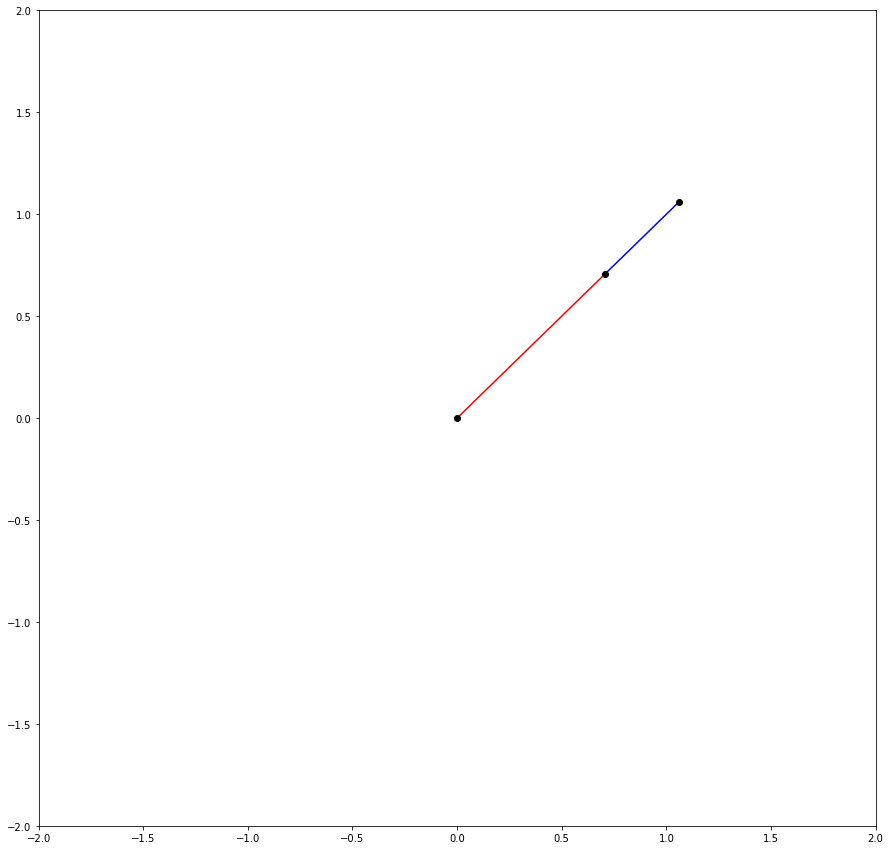

In [9]:
class TwoLinkArm:
    def __init__(self, joint_angles= [0, 0]):
        self.shoulder = np.array([0, 0])
        self.link_lengths = [1, 0.5]
        self.update_joints(joint_angles)
        
    def update_joints(self, joint_angles):
        self.joint_angles = joint_angles
        self.forward_kinematics()
        
    def forward_kinematics(self):
        theta0 = self.joint_angles[0]
        theta1 = self.joint_angles[1]
        l0 = self.link_lengths[0]
        l1 = self.link_lengths[1]
        self.elbow = self.shoulder + np.array([l0 * cos(theta0), l0 * sin(theta0)])
        self.wrist = self.elbow + np.array([l1 * cos(theta0 + theta1), l1 * sin(theta0 + theta1)])
        
    def plot(self):
        plt.axis([-2,2,-2,2])
        plt.plot([self.shoulder[0], self.elbow[0]], [self.shoulder[1], self.elbow[1]], 'r-')
        plt.plot([self.elbow[0], self.wrist[0]], [self.elbow[1], self.wrist[1]], 'b-')
        plt.plot(self.shoulder[0], self.shoulder[1], 'ko')
        plt.plot(self.elbow[0], self.elbow[1], 'ko')
        plt.plot(self.wrist[0], self.wrist[1], 'ko')
 

arm = TwoLinkArm([pi/4, 0])
arm.plot()

## Random Plot with Rotation Matrix

In [10]:
# help functions
def transform_points(points, theta, origin):
    T = np.array([[cos(theta), -sin(theta), origin[0]],
                 [sin(theta), cos(theta), origin[1]],
                 [0, 0, 1]])
    return T@np.array(points)

def draw_angle(angle, offset=0, origin=[0, 0], r=0.5, n_points=100):
    x_start = r*cos(angle)
    x_end = r
    dx = (x_end - x_start)/(n_points - 1)
    coords = [[0 for _ in range(n_points)] for _ in range(3)]
    x = x_start
    for i in range(n_points-1):
        y = sqrt(r**2 - x**2)
        coords[0][i] = x
        coords[1][i] = y
        coords[2][i] = 1
        x += dx
        
    coords[0][-1] = r
    coords[2][-1] = 1
    coords = transform_points(coords, offset, origin)
    plt.plot(coords[0], coords[1], 'k-')

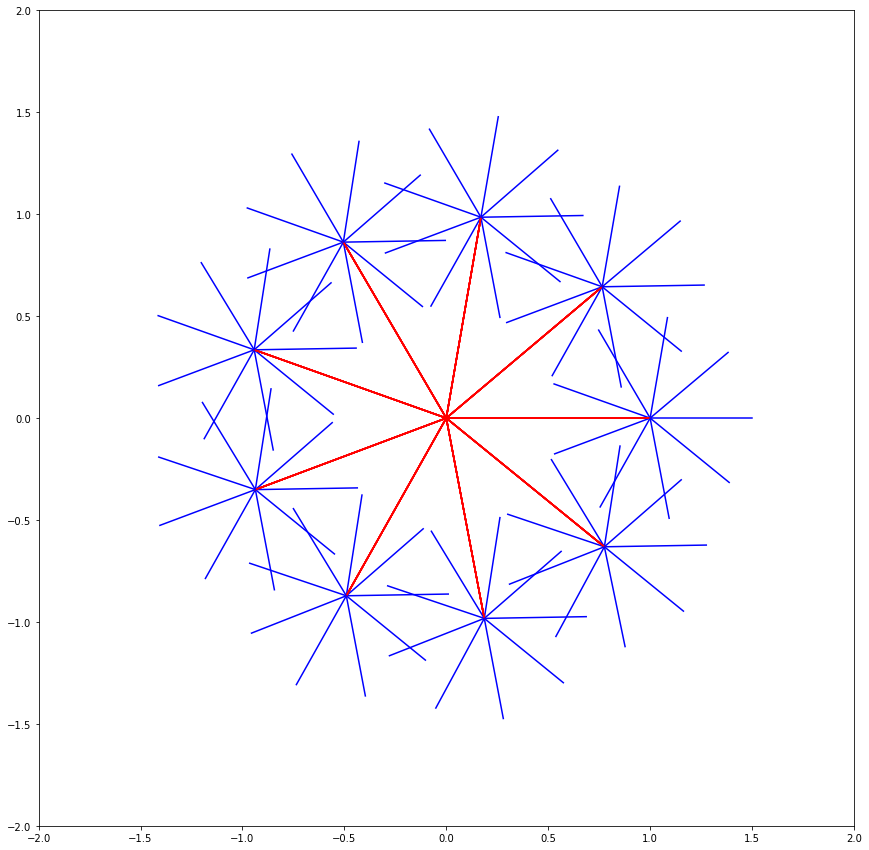

In [11]:
arm = TwoLinkArm()

theta0 = 45 * pi / 180
theta1 = -45 * pi / 180

# arm.update_joints([theta0, theta1])
# arm.plot()

test = np.arange(0,2*pi,0.7)
all_elbow = []
all_wrist = []
# all_elbow = np.zeros((len(test), 2))
# all_wrist = np.zeros((len(test), 2))

for i in range(len(test)):
    for j in range(len(test)):
        arm.update_joints([test[i], test[j]])
        all_elbow.append(arm.elbow)
        all_wrist.append(arm.wrist)

all_elbow = np.asarray(all_elbow)
all_wrist = np.asarray(all_wrist)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect(1)
ax.axis([-2,2,-2,2])

# plt.plot(all_wrist[:,0], all_wrist[:,1], 'ko')
# plt.plot(all_elbow[:,0], all_elbow[:,1], 'ko')
for i in range(len(test)**2):
    plt.plot([0,all_elbow[i,0]], [0, all_elbow[i, 1]], 'r-')
    plt.plot([all_elbow[i,0], all_wrist[i,0]], [all_elbow[i, 1], all_wrist[i,1]], 'b-')